# References

- [1] https://stanfordnlp.github.io/CoreNLP/index.html
- [2] https://www.khalidalnajjar.com/setup-use-stanford-corenlp-server-python/
- [3] https://cloudacademy.com/blog/natural-language-processing-stanford-corenlp/

# Introduction

- Developed by Stanford University, mainly targeted for Java developer
- Some features: [1]
 - derive lingusitic annotations for text
 - numeric and time values
 - dependency and constituency parses
 - coreference
 - sentiment
 - quote attributions
 - relations
- Support 6 languages: Arabic, Chinese, English, French, German, and Spanish


## Pipeline [1]
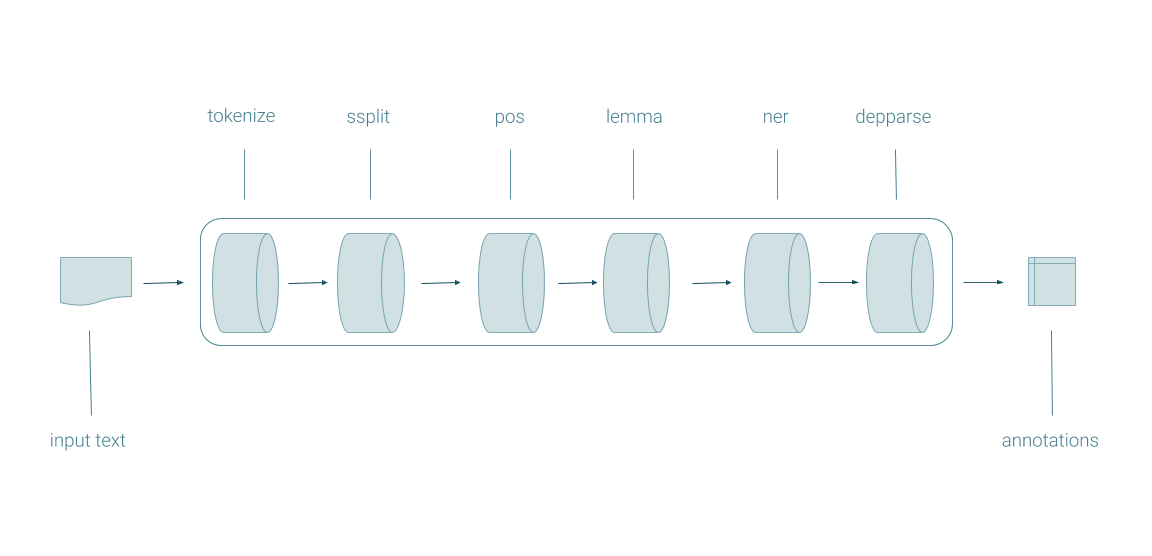

## Why StanfordCoreNLP? [3]

- Useful when we need to deploy a fully functional NLP in our local machine
- We want to play with cutting-edge features which somehow not easy to find in industrial NLP platforms

# Setup CoreNLP with Python [2]

- Download the Stanford CoreNLP file from its [official website](https://stanfordnlp.github.io/CoreNLP/index.html#download)
- Install Java 8
- Unzip the downloaded .zip file and go to its directory
- Run this command

```
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 30000
```

- Access Standford CoreNLP Server using Python

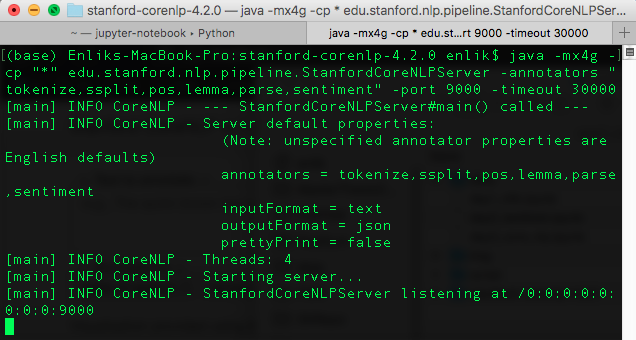
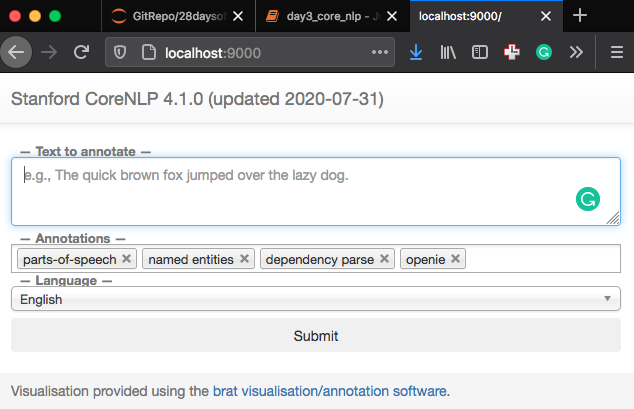

## Python Scripts [2] and [3]

In [1]:
## install dependencies
# !pip install stanfordcorenlp
# !pip install pycorenlp==0.3.0

In [2]:
'''
A sample code usage of the python package stanfordcorenlp to access a Stanford CoreNLP server.
Written as part of the blog post: https://www.khalidalnajjar.com/how-to-setup-and-use-stanford-corenlp-server-with-python/ 
'''

from stanfordcorenlp import StanfordCoreNLP
import logging
import json

class StanfordNLP:
    def __init__(self, host='http://localhost', port=9000):
        self.nlp = StanfordCoreNLP(host, port=port,
                                   timeout=30000)  # , quiet=False, logging_level=logging.DEBUG)
        self.props = {
            'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
            'pipelineLanguage': 'en',
            'outputFormat': 'json'
        }

    def word_tokenize(self, sentence):
        return self.nlp.word_tokenize(sentence)

    def pos(self, sentence):
        return self.nlp.pos_tag(sentence)

    def ner(self, sentence):
        return self.nlp.ner(sentence)

    def parse(self, sentence):
        return self.nlp.parse(sentence)

    def dependency_parse(self, sentence):
        return self.nlp.dependency_parse(sentence)

    def annotate(self, sentence):
        return json.loads(self.nlp.annotate(sentence, properties=self.props))

    @staticmethod
    def tokens_to_dict(_tokens):
        tokens = defaultdict(dict)
        for token in _tokens:
            tokens[int(token['index'])] = {
                'word': token['word'],
                'lemma': token['lemma'],
                'pos': token['pos'],
                'ner': token['ner']
            }
        return tokens

if __name__ == '__main__':
    sNLP = StanfordNLP()
    text = 'A blog post using Stanford CoreNLP Server. Visit www.khalidalnajjar.com for more details.'
    print("Annotate:", sNLP.annotate(text))
    print("POS:", sNLP.pos(text))
    print("Tokens:", sNLP.word_tokenize(text))
    print("NER:", sNLP.ner(text))
    print("Parse:", sNLP.parse(text))
    print("Dep Parse:", sNLP.dependency_parse(text))

Annotate: {'sentences': [{'index': 0, 'parse': '(ROOT\n  (NP\n    (NP (DT A) (NN blog) (NN post))\n    (VP (VBG using)\n      (NP (NNP Stanford) (NN CoreNLP) (NN Server)))\n    (. .)))', 'basicDependencies': [{'dep': 'ROOT', 'governor': 0, 'governorGloss': 'ROOT', 'dependent': 3, 'dependentGloss': 'post'}, {'dep': 'det', 'governor': 3, 'governorGloss': 'post', 'dependent': 1, 'dependentGloss': 'A'}, {'dep': 'compound', 'governor': 3, 'governorGloss': 'post', 'dependent': 2, 'dependentGloss': 'blog'}, {'dep': 'acl', 'governor': 3, 'governorGloss': 'post', 'dependent': 4, 'dependentGloss': 'using'}, {'dep': 'compound', 'governor': 7, 'governorGloss': 'Server', 'dependent': 5, 'dependentGloss': 'Stanford'}, {'dep': 'compound', 'governor': 7, 'governorGloss': 'Server', 'dependent': 6, 'dependentGloss': 'CoreNLP'}, {'dep': 'obj', 'governor': 4, 'governorGloss': 'using', 'dependent': 7, 'dependentGloss': 'Server'}, {'dep': 'punct', 'governor': 3, 'governorGloss': 'post', 'dependent': 8, 'dep

NER: [('A', 'O'), ('blog', 'O'), ('post', 'O'), ('using', 'O'), ('Stanford', 'O'), ('CoreNLP', 'O'), ('Server', 'O'), ('.', 'O'), ('Visit', 'O'), ('www.khalidalnajjar.com', 'URL'), ('for', 'O'), ('more', 'O'), ('details', 'O'), ('.', 'O')]
Parse: (ROOT
  (NP
    (NP (DT A) (NN blog) (NN post))
    (VP (VBG using)
      (NP (NNP Stanford) (NN CoreNLP) (NN Server)))
    (. .)))
Dep Parse: [('ROOT', 0, 3), ('det', 3, 1), ('compound', 3, 2), ('acl', 3, 4), ('compound', 7, 5), ('compound', 7, 6), ('obj', 4, 7), ('punct', 3, 8), ('ROOT', 0, 1), ('obj', 1, 2), ('case', 5, 3), ('amod', 5, 4), ('obl', 1, 5), ('punct', 1, 6)]


In [3]:
from pprint import pprint
from pycorenlp.corenlp import StanfordCoreNLP
host = "http://localhost"
port = "9000"
nlp = StanfordCoreNLP(host + ":" + port)
text = "Joshua Brown, 40, was killed in Florida in May when his Tesla failed to " \
       "differentiate between the side of a turning truck and the sky while " \
       "operating in autopilot mode."
output = nlp.annotate(
    text,
    properties={
        "outputFormat": "json",
        "annotators": "depparse,ner,entitymentions,sentiment"
    }
)
pprint(output)

{'sentences': [{'basicDependencies': [{'dep': 'ROOT',
                                       'dependent': 7,
                                       'dependentGloss': 'killed',
                                       'governor': 0,
                                       'governorGloss': 'ROOT'},
                                      {'dep': 'compound',
                                       'dependent': 1,
                                       'dependentGloss': 'Joshua',
                                       'governor': 2,
                                       'governorGloss': 'Brown'},
                                      {'dep': 'nsubj:pass',
                                       'dependent': 2,
                                       'dependentGloss': 'Brown',
                                       'governor': 7,
                                       'governorGloss': 'killed'},
                                      {'dep': 'punct',
                                       'dependen

                            'before': '',
                            'characterOffsetBegin': 0,
                            'characterOffsetEnd': 6,
                            'index': 1,
                            'lemma': 'Joshua',
                            'ner': 'PERSON',
                            'originalText': 'Joshua',
                            'pos': 'NNP',
                            'word': 'Joshua'},
                           {'after': '',
                            'before': ' ',
                            'characterOffsetBegin': 7,
                            'characterOffsetEnd': 12,
                            'index': 2,
                            'lemma': 'Brown',
                            'ner': 'PERSON',
                            'originalText': 'Brown',
                            'pos': 'NNP',
                            'word': 'Brown'},
                           {'after': ' ',
                            'before': '',
                          

                            'ner': 'O',
                            'originalText': 'in',
                            'pos': 'IN',
                            'word': 'in'},
                           {'after': ' ',
                            'before': ' ',
                            'characterOffsetBegin': 153,
                            'characterOffsetEnd': 162,
                            'index': 31,
                            'lemma': 'autopilot',
                            'ner': 'O',
                            'originalText': 'autopilot',
                            'pos': 'NN',
                            'word': 'autopilot'},
                           {'after': '',
                            'before': ' ',
                            'characterOffsetBegin': 163,
                            'characterOffsetEnd': 167,
                            'index': 32,
                            'lemma': 'mode',
                            'ner': 'O',
                            